## 1. Συλλογή δεδομένων
Με την εκτελεση του 'collectItems.py', συλλέχθηκαν τα άρθρα από τη Wikipedia και αποθηκεύονται με την μορφη JSON, όπου υπάρχουν τα πεδία του τίτλου και το περιεχόμενο.

In [1]:
from bs4 import BeautifulSoup
import requests
import json

#Συνάρτηση για την συλλογή άρθρων από Wikipedia
def fetch_wikipedia_article(url):
    response = requests.get(url)
    if response.status_code==200:
        page_content = response.text
        soup = BeautifulSoup(page_content, 'html.parser')

        #Ανάκτηση τίτλου και περιεχομένου
        title = soup.find('h1').text
        paragraphs = [p.text for p in soup.find_all('p')]
        content = ' '.join(paragraphs)

        return {'title': title, 'content': content}
    else:
        print(f"Failed to fetch article: {url}")
        return None

#Λίστα με URLs άρθρων από τη Wikipedia
wikipedia_urls =[
    'https://en.wikipedia.org/wiki/Web_scraping',
    'https://en.wikipedia.org/wiki/Data_science',
    'https://en.wikipedia.org/wiki/Information_retrieval',
    'https://en.wikipedia.org/wiki/Data_mining',
    'https://en.wikipedia.org/wiki/Cluster_analysis',
    'https://en.wikipedia.org/wiki/Information_extraction',
    'https://en.wikipedia.org/wiki/Knowledge_extraction',
    'https://en.wikipedia.org/wiki/Search_engine',
    'https://en.wikipedia.org/wiki/Comparison_of_search_engines',
    'https://en.wikipedia.org/wiki/List_of_search_engines',
    'https://en.wikipedia.org/wiki/Search_engine_optimization',
    'https://en.wikipedia.org/wiki/Search_engine_scraping',
    'https://en.wikipedia.org/wiki/Conversion_rate_optimization',
    'https://en.wikipedia.org/wiki/A/B_testing',
    'https://en.wikipedia.org/wiki/Personalization#Web_pages',
    'https://en.wikipedia.org/wiki/Big_data',
    'https://en.wikipedia.org/wiki/Data_engineering',
    'https://en.wikipedia.org/wiki/Software_engineering',
    'https://en.wikipedia.org/wiki/Computer_science',
    'https://en.wikipedia.org/wiki/Software_development',
    'https://en.wikipedia.org/wiki/Systems_analyst',
    'https://en.wikipedia.org/wiki/Data_analysis',
    'https://en.wikipedia.org/wiki/Machine_learning',
    'https://en.wikipedia.org/wiki/Deep_learning',
    'https://en.wikipedia.org/wiki/Open_data'
    ]

#Συλλογή άρθρων
articles = []
for url in wikipedia_urls:
    article = fetch_wikipedia_article(url)
    if article:
        articles.append(article)

#Αποθήκευση δεδομένων σε αρχείο JSON
with open('wikipedia_articles.json', 'w', encoding='utf-8') as f:
    json.dump(articles, f, ensure_ascii=False, indent=4)

print("Τα άρθρα συλλέχθησαν και αποθηκεύτηκαν επιτυχώς στο αρχειο 'wikipedia_articles.json'.")


Τα άρθρα συλλέχθησαν και αποθηκεύτηκαν επιτυχώς στο αρχειο 'wikipedia_articles.json'.


Τα άρθρα συλλέχθησαν και αποθηκεύτηκαν επιτυχώς στο αρχειο 'wikipedia_articles.json'.

## 2. Προεπεξεργασία κειμένου (Text Processing)
Με την προεπεξεργασία κειμένου, κανονικοποιείται το κείμενο, αφού αφαιρούνται η παραπλήσια πληροφορία.
Αρχικα, με το εργαλείο tokenization, διαχωρίζεται το κείμενο σε λέξεις, με την δυνατότητα επεξεργασίας κάθε λεξης ξεχωριστά.
Στην συνέχεια, αφαιρούνται τα σημεία στίξης, όπως οι τελείες, τα κόμματα και τα υπόλοιπα.
Έπειτα, αφαιρούνται και stopwords, δηλαδή οι κοινές λέξεις που δεν προσφέρουν ιδιαίτερη πληροφορία, οπως το "is", "the" και τα υπόλοιπα.
Τέλος, με το εργαλείο lemmatization, μετατρέπονται οι λέξεις στην προτότυπη μορφή τους, ώστε να αποθηκευτεί εκ νέου σε ένα αρχείο της μορφής JSON.

In [ ]:


import json

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

#Αρχικοποίηση εργαλείων
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#Φόρτωση άρθρων από το αρχείο JSON
with open('wikipedia_articles.json', 'r', encoding='utf-8') as f:
    articles = json.load(f)

#Συνάρτηση για την προεπεξεργασία κειμένου
def preprocess_text(text):
    #Μετατροπή σε πεζά και Tokenization
    tokens = word_tokenize(text.lower())

    #Αφαίρεση σημείων στίξης
    tokens = [word for word in tokens if word not in string.punctuation]

    #Αφαίρεση stop words
    fil_tokens = [word for word in tokens if word not in stop_words]

    #Lemmatization
    lem_tokens = [lemmatizer.lemmatize(word) for word in fil_tokens]

    return lem_tokens

#Δημιουργία του επεξεργασμένου αρχείου
processed_articles = []

#Εφαρμογή της προεπεξεργασίας σε όλα τα άρθρα και υπολογισμός στατιστικών
for article in articles:
    processed_content = preprocess_text(article['content'])
    processed_articles.append({
        'title': article['title'],
        'processed_content': processed_content})


#Αποθήκευση των επεξεργασμένων άρθρων σε νέο αρχείο JSON
with open('processed_wikipedia_articles.json', 'w', encoding='utf-8') as f:
    json.dump(processed_articles, f, ensure_ascii=False, indent=4)

print("Η προεπεξεργασία και τα στατιστικά των άρθρων ολοκληρώθηκαν και αποθηκεύτηκαν στο 'processed_wikipedia_articles.json'.")


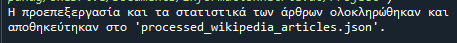

## 3. Ευρετήριο (Indexing)
Με την δημιούργια του ευρετηρίου οργανώνονται τα δεδομένα με τέτοιο τρόπο για ευκολότερη αναζήτηση όρων στο σύνολο δεδομένων. Με το ανεστραμμένο ευρετήριο συνδέεται κάθε λέξη με τα έγγραφα και τις θέσεις όπου εμφανίζονται. Το ανεστραμμένο ευρετήριο αποθηκεύεται σε ένα αρχείο της μορφής JSON.

In [ ]:

import json
from collections import defaultdict

#Φόρτωση των προεπεξεργασμένων κειμένων
with open('processed_wikipedia_articles.json', 'r', encoding='utf-8') as f:
    articles = json.load(f)

#Δημιουργία ανεστραμμένου ευρετηρίου
inverted_index = defaultdict(list)

#Συμπλήρωση του ανεστραμμένου ευρετηρίου
for doc_id, article in enumerate(articles):
    for position, word in enumerate(article['processed_content']):
        #Πρσθήκη του doc_id και της θέσης λέξης στο ευρετήριο για κάθε λέξη
        inverted_index[word].append((doc_id, position))

#Αποθήκευση του ευρετήριου σε JSON
with open('inverted_index.json', 'w', encoding='utf-8') as f:
    json.dump(inverted_index, f, ensure_ascii=False, indent=4)

print("Το ανεστραμμένο ευρετήριο αποθηκεύτηκε στο inverted_index.json.")

image.png

## 4. Μηχανή αναζήτησης (Search Engine)
### α) Επεξεργασία ερωτήματος (Query Processing)
Σε αυτήν την ενότητα, εφαρμόζεται η επεξεργασία ερωτήματος χρησιμοποιώντας τη μέθοδο Boolean Retrieval.
Η μέθοδος βασίζεται στις λογικές πράξεις (AND, OR & NOT) για την ανάκτηση εγγράφων

In [ ]:
#Συνάρτηση για χρήση Boolean Retrieval
def boolean_retrieve_docs(question_term, operator):
    result_docs = set()
    if operator == "AND":
        #Η τομή όλων των εγγραφών που περιέχουν τους όρους
        result_docs = set(range(len(articles)))
        for term in question_term:
            if term in inverted_index:
                doc_ids = {doc_id for doc_id, _ in inverted_index[term]}
                result_docs &= doc_ids
            else:
                result_docs = set()
                break
        return result_docs

    elif operator == "OR":
        #Η ένωση όλων των εγγραφών που περιέχουν τους όρους
         result_docs = set()
         for term in question_term:
             if term in inverted_index:
                 doc_ids = {doc_id for doc_id, _ in inverted_index[term]}
                 result_docs |= doc_ids
             else:
                  print("Μη έγκυρη επιλογή.")
                  return
         return result_docs

    elif operator == "NOT":
        #Συμπλήρωμα των εγγραφών που περιέχουν τους όρους
        all_docs = set(range(len(articles)))
        for term in question_term:
            if term in inverted_index:
                doc_ids = {doc_id for doc_id, _ in inverted_index[term]}
                all_docs -= doc_ids
        return all_docs

    return set()

     while True:
        question = input("Τι θα αναζητήσεις σήμερα: ")
        if ":" in question:
            parts = question.split(":", 1)
            telesths = parts[0].strip().upper()
            oroi = parts[1].strip().split()
            res = boolean_retrieve_docs(oroi, telesths)
            if not res:
                print("Δεν βρέθηκαν αποτελέσματα!")
            else:
                print(f"Αποτε΄λέσματα '{question}':")
                for doc_id in res:
                    print(f"Έγγραφο {doc_id}, Τίτλος: {articles[doc_id]['title']}")

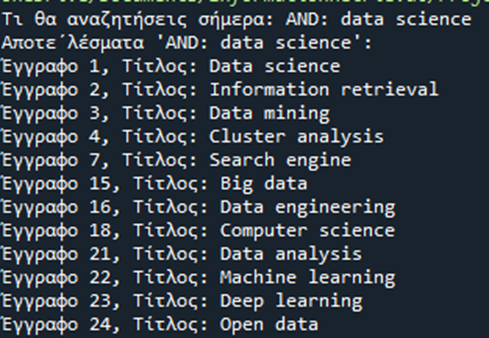 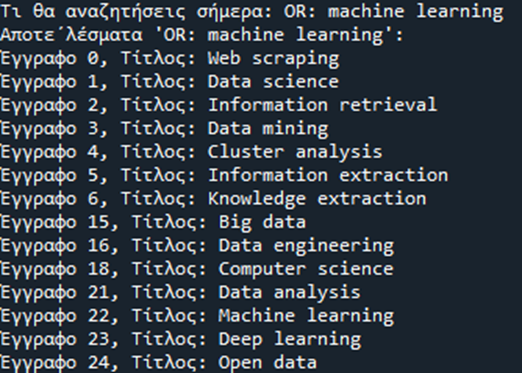 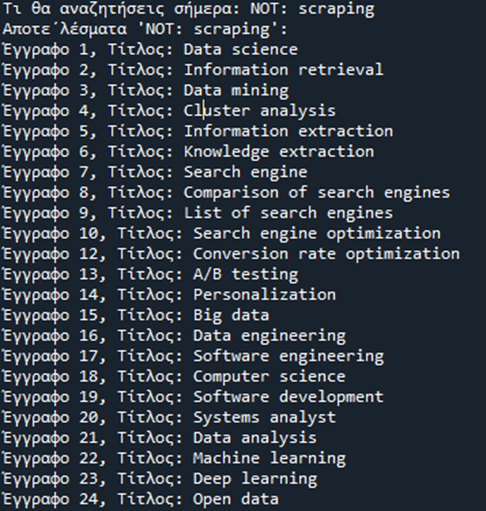

## 4. Μηχανή αναζήτησης (Search Engine)
### Κατάταξη αποτελεσμάτων (Ranking)
Στην ενότητα αυτή, χρησιμοποιούνται 3 αλγόριθμοι κατάταξης, για να βρεθεί κατα πόσο σχετίζεται το ερώτημα με το έγγραφο που θα ανακτηθεί.

1. TF-IDF

In [ ]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer

# Δημιουργία corpus με τα περιεχόμενα των άρθρων
titles = [article['title'] for article in articles]
corpus = [' '.join(article['processed_content']) for article in articles]

#Υλοποίηση TF-IDF με Scikit-learn
tfidf_vector = TfidfVectorizer(vocabulary=inverted_index.keys())
tfidf_matrix = tfidf_vector.fit_transform(corpus)

#Συνάρτηση για υπολογισμό TF-IDF
def search_tfidf(query):
    query_vector = tfidf_vector.transform([query])
    scores = (tfidf_matrix * query_vector.T).toarray().flatten()
    ranked_docs = sorted(enumerate(scores), key=lambda x: x[1], reverse=True)
    return [(doc_id, score) for doc_id, score in ranked_docs if score > 0]

 print("Επέλεξε αλγόριθμο: 1. TF-IDF, 2. Okapi BM25, 3. Vector Space Model(VSM)")
            choice = input("Επιλογή: ")
            if choice == "1":
                res = search_tfidf(question)
            elif choice == "2":
                res = search_bm25(question)
            elif choice == "3":
                res = search_vsm(question)
            else:
                print("Όχι τέτοια επιλογή!")
                continue

            if not res:
                print("Δεν βρέθηκε το έγγραφο.")
            else:
                print(f"Αποτελέσματα '{question}':")
                for doc_id, score in res[:5]:
                    print(f"'Εγγραφο {doc_id}, Τίτλος: {articles[doc_id]['title']}, Σκορ: {score:.4f}")


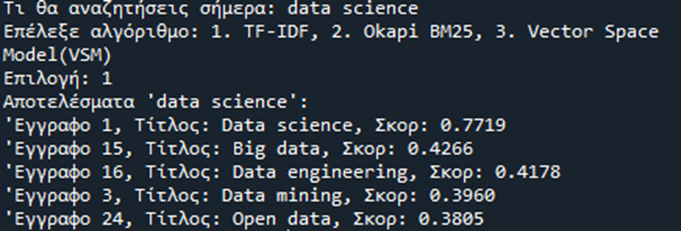

2. Okapi BM25

In [ ]:
from rank_bm25 import BM25Okapi

#Υλοποοίηση BM25 με rank_bm25
bm25_model = BM25Okapi([doc.split() for doc in corpus])

#Συνάρτηση για υπολογισμό Okapi BM25
def search_bm25(query):
    query_terms = query.split()
    scores = bm25_model.get_scores(query_terms)
    ranked_docs = sorted(enumerate(scores), key=lambda x: x[1], reverse=True)
    return [(doc_id, score) for doc_id, score in ranked_docs if score > 0]


print("Επέλεξε αλγόριθμο: 1. TF-IDF, 2. Okapi BM25, 3. Vector Space Model(VSM)")
            choice = input("Επιλογή: ")
            if choice == "1":
                res = search_tfidf(question)
            elif choice == "2":
                res = search_bm25(question)
            elif choice == "3":
                res = search_vsm(question)
            else:
                print("Όχι τέτοια επιλογή!")
                continue

            if not res:
                print("Δεν βρέθηκε το έγγραφο.")
            else:
                print(f"Αποτελέσματα '{question}':")
                for doc_id, score in res[:5]:
                    print(f"'Εγγραφο {doc_id}, Τίτλος: {articles[doc_id]['title']}, Σκορ: {score:.4f}")


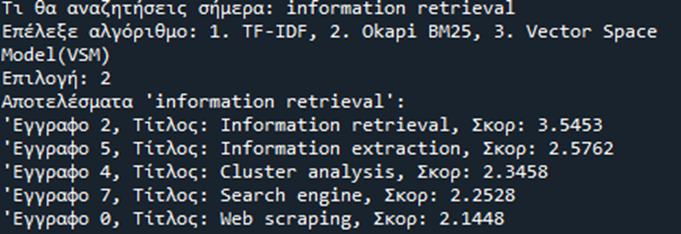

3. Vector Space Model (VSM)

In [ ]:
#Συνάρτηση για υπολογισμό με Vector Space Model
def search_vsm(query):
    query_vector = tfidf_vector.transform([query]).toarray()
    doc_vectors = tfidf_matrix.toarray()
    scores = [sum(query_vector[0] * doc_vector) for doc_vector in doc_vectors]
    ranked_docs = sorted(enumerate(scores), key=lambda x: x[1], reverse=True)
    return [(doc_id, score) for doc_id, score in ranked_docs if score > 0]

print("Επέλεξε αλγόριθμο: 1. TF-IDF, 2. Okapi BM25, 3. Vector Space Model(VSM)")
            choice = input("Επιλογή: ")
            if choice == "1":
                res = search_tfidf(question)
            elif choice == "2":
                res = search_bm25(question)
            elif choice == "3":
                res = search_vsm(question)
            else:
                print("Όχι τέτοια επιλογή!")
                continue

            if not res:
                print("Δεν βρέθηκε το έγγραφο.")
            else:
                print(f"Αποτελέσματα '{question}':")
                for doc_id, score in res[:5]:
                    print(f"'Εγγραφο {doc_id}, Τίτλος: {articles[doc_id]['title']}, Σκορ: {score:.4f}")


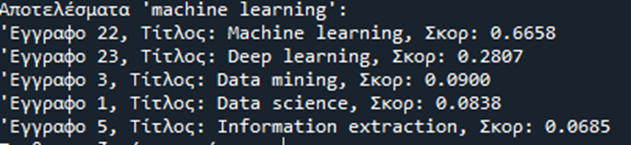

## 5. Αξιολόγηση συστήματος
Στην ενότητα αυτή, θα αξιολογηθεί η αποδοτικότητα της μηχανής αναζήτησης χρησιμοποιώντας μετρήσεις όπως h ακρίβεια (precision), η ανάκληση (recall), το F1-score και την μέση ανρίβεια (MAP).

In [ ]:
import json
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from search_idle import search_tfidf, search_bm25, search_vsm

#Υποθετική λίστα φράσεων για κάθε ερώτημα
relevant_docs = {
    "web scraping": [0],
    "data science": [1],
    "information retrieval": [2],
    "data mining": [3],
    "cluster analysis": [4],
    "information extraction": [5],
    "knowledge extraction": [6],
    "machine learning": [7],
    "deep learning": [8],
    "big data": [9]
    }

#Συνάρτηση για τον υπολογισμό της ακρίβειας, ανάκλησης και του F1-score
def aksiologisi_question(relevant, retrieved_docs):
    #Βρίσκουμε τα έγγραφα που σχετίζονται απο την ανάκτηση
    y_true = [1 if doc in relevant else 0 for doc in range(len(articles))]
    y_pred = [1 if doc in retrieved_docs else 0 for doc in range(len(articles))]

    #Υπολογισμός της ακρίβειας, ανάκλησης και F1-score
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    #MAP
    ap = average_precision_score(y_true, y_pred)

    return precision, recall, f1, ap

#Συνάρτηση για την αξιολόγηση της μηχανής αναζήτησης
def aksiologisi_mixanis_anazitisis():
    for retrieval_name, retrieval_function in {
            "TF-IDF": search_tfidf,
            "Okapi BM25": search_bm25,
            "Vector Space Model (VSM)": search_vsm}.items():
        print(f"Αξιολόγηση με {retrieval_name}")
        total_prec, total_rec, total_f1, total_ap = 0, 0, 0, 0

        for question, relevant in relevant_docs.items():
            question_term = " ".join(question.split())
            #Ανάκτηση εγγράφων
            retrieved = retrieval_function(question_term)
            retrieved_docs = [doc_id for doc_id, _ in retrieved[:10]]

            precision, recall, f1_score, ap = aksiologisi_question(relevant, retrieved_docs)
            total_prec += precision
            total_rec += recall
            total_f1 += f1_score
            total_ap += ap

            print(f"Ακρίβεια: {precision:.2f}, Ανάκληση: {recall:.2f}, F1-score: {f1_score:.2f}, AP: {ap:.2f}.")


    #Μέσοι όροι
    avg_prec = total_prec / len(relevant_docs)
    avg_rec = total_rec / len(relevant_docs)
    avg_f1  = total_f1 / len(relevant_docs)
    avg_ap = total_ap / len(relevant_docs)

    print(f"Μέση Ακρίβεια: {avg_prec:.2f}, Μέση Ανάκληση: {avg_rec:.2f}, Μέσο F1-score: {avg_f1:.2f}, Μέσο MAP: {avg_ap:.2f}\n")


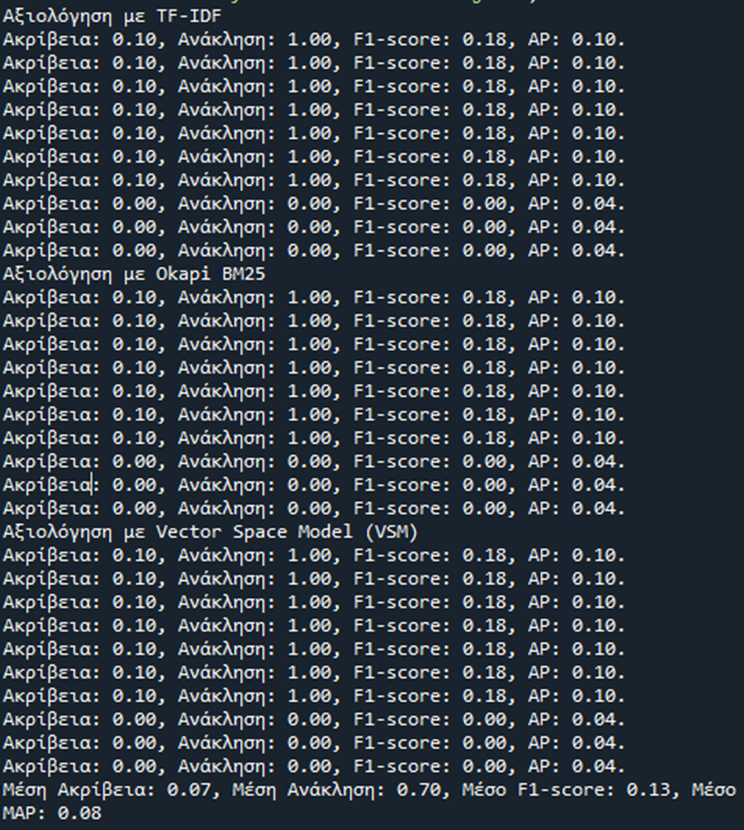